In [56]:
from pynwb import NWBHDF5IO
import soundfile
import matplotlib.pyplot as plt
import os
import numpy as np
from speech_Dutch.config import *

In [22]:
data_dir=top_data_dir+'SingleWordProductionDutch/'
computer='Yoga'
sid=1 # 1-10
sf_audio=48000
sf_eeg=1024
participant = 'sub-' + f"{sid:02d}"
sub_folder=data_dir+participant+'/'
use_channels=False

In [23]:
def read_Dutch(participant):
    # Load data
    filename = sub_folder+'ieeg/'+ participant + '_task-wordProduction_ieeg.nwb'
    print('Loading ' + filename + '.')
    io = NWBHDF5IO(filename, 'r')
    nwbfile = io.read()
    # sEEG
    eeg = nwbfile.acquisition['iEEG'].data[:]  # (307523, 127)
    if use_channels:
        eeg=eeg[:,use_channels]
    eeg_sr = 1024
    # audio
    audio = nwbfile.acquisition['Audio'].data[:]  # (14414532,)
    audio_sr = 48000
    #target_SR = 16000
    # words (markers)
    words = nwbfile.acquisition['Stimulus'].data[:]
    words = np.array(words, dtype=str)  # (307511,)
    io.close()
    return eeg, audio, words

In [25]:
eeg, audio, words=read_Dutch(participant)

Loading D:/data/BaiduSyncdisk/SingleWordProductionDutch/sub-01/ieeg/sub-01_task-wordProduction_ieeg.nwb.


D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


In [36]:
soundfile.write(sub_folder+'audio.wav', audio, sf_audio)

In [54]:
unique_words=[w for i, w in enumerate(words[:-1]) if words[i+1]!=words[i] and w!='']


In [55]:
unique_words

['helft',
 'hierop',
 'stiekem',
 'en',
 'zevenduizend',
 'braadde',
 'vloog',
 'werd',
 'wegpakte',
 'wak',
 'zich',
 '9',
 '10',
 'tuwiet',
 'bakker',
 'hem',
 'kin',
 'stilstaan',
 'bevrijd',
 'aan',
 'wel',
 'was',
 'hoe',
 '8',
 'groen',
 'maantje',
 'vogelkooitje',
 '6',
 'teruggekregen',
 'wanneer',
 'juist',
 'zanddak',
 'lij',
 'of',
 'over',
 'dat',
 'betovering',
 'gefluit',
 '3',
 'zei',
 'bak',
 '5',
 'niet',
 'nachtegalen',
 'te',
 'komt',
 'van',
 'dauwdruppel',
 'met',
 'sterkste',
 'totdat',
 'helemaal',
 'mooie',
 'sprong',
 'ze',
 'smeekte',
 'pak',
 'boomstammen',
 'dan',
 'er',
 'onmiddellijk',
 'vogeltje',
 'dit',
 'door',
 'mooi',
 'een',
 'zijn',
 'nog',
 'op',
 'verstijfde',
 'al',
 'het',
 'haar',
 'redetwisten',
 'om',
 'kasteel',
 'vak',
 '7',
 'donkere',
 'struik',
 'naar',
 'maar',
 'ook',
 'verdwaald',
 '12',
 'dakker',
 'je',
 'direct',
 '2',
 'spreuk',
 'binnenplaats',
 'hij',
 'onschuldig',
 'als',
 '`s',
 'tussen',
 'zo',
 'meisjes',
 'veel',
 'schold

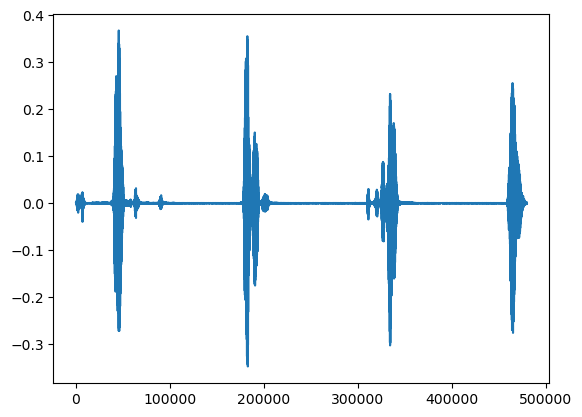

In [62]:
%matplotlib inline
plt.plot(audio[0*sf_audio:10*sf_audio])

Detect the onset of each trial.